In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def read_image(file_name: str):
    return cv2.imread(file_name)

def colour2bw(image):
    grey_horse = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (_, white_horse) = cv2.threshold(grey_horse, 10, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return white_horse

def image2pixels(bw_image):    
    # Initialise arrays to store positions of each pixel
    x_pixels = np.zeros(len(bw_image.flatten()))
    y_pixels = np.zeros(len(bw_image.flatten()))
    # Store position of each pixel
    count = 0
    for row in range(bw_image.shape[0]):
        for column in range(bw_image.shape[1]):
            if bw_image[row,column] != 0:
                x_pixels[count] = column
                y_pixels[count] = -row
            count += 1
    # Remove datapoints where there are no pixels
    x_pixels = x_pixels[x_pixels != 0]
    y_pixels = y_pixels[y_pixels != 0]
    return x_pixels, y_pixels

def file2pixels(file_name: str):
    image = read_image(file_name)
    bw_image = colour2bw(image)
    x_pixels, y_pixels = image2pixels(bw_image)
    return bw_image, (x_pixels, y_pixels)

## Display images and pixel images

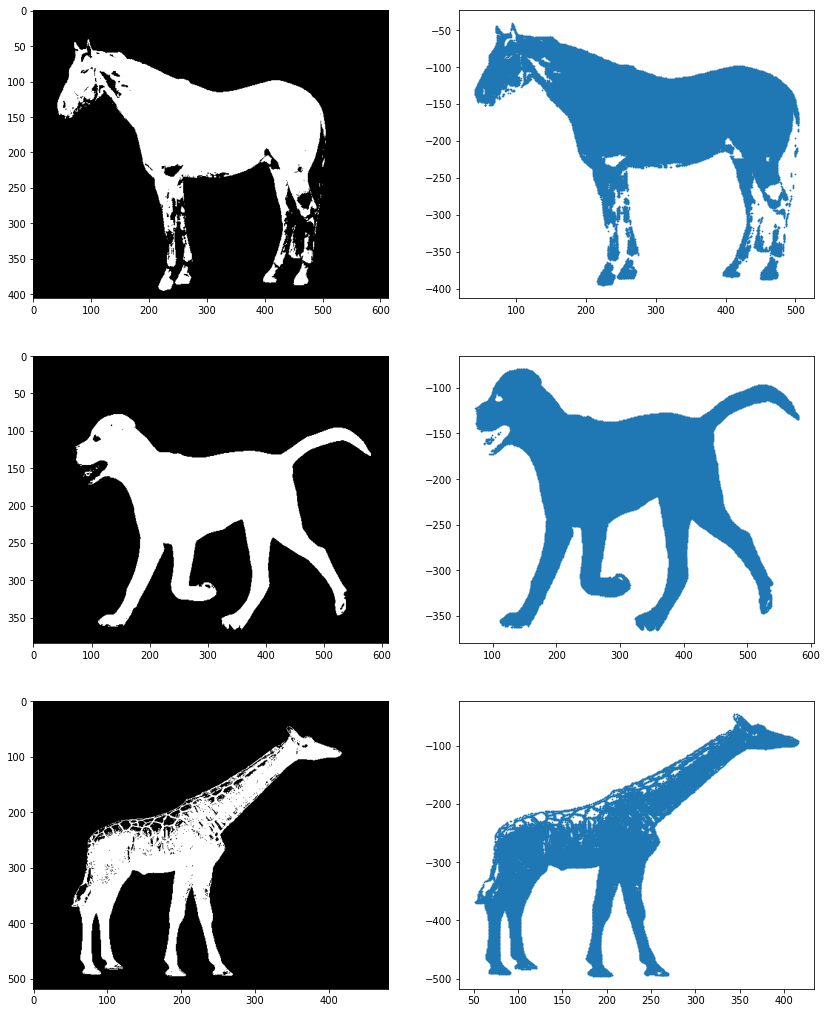

In [34]:
# Collect data
horse = file2pixels('Images/horse.png')
poochie = file2pixels('Images/DogNoBg.png')
girrafe = file2pixels('Images/GiraffeNoBG.png')

# Make figure
fig, ax = plt.subplots(3, 2, figsize=(14,18))

# Plot horse
ax[0][0].imshow(horse[0], cmap='gray', aspect='auto')
ax[0][1].scatter(horse[1][0], horse[1][1], s=0.5)

# Plot poochie
ax[1][0].imshow(poochie[0], cmap='gray', aspect='auto')
ax[1][1].scatter(poochie[1][0], poochie[1][1], s=0.5)

# Plot giraffe
ax[2][0].imshow(girrafe[0], cmap='gray', aspect='auto')
ax[2][1].scatter(girrafe[1][0], girrafe[1][1], s=0.5)

plt.show()